In [3]:
import pandas as pd

Split themes into general categories

In [57]:
non_system_themes = [
    'Action Wheelers',
    'Bionicle',
    'Books',
    'Dimensions',
    'Duplo',
    'Explore',
    'Games',
    'Primo',
    'Quatro',
    'Scala',
    'Znap',
]

licensed_themes = [
    'Architecture',
    'Avatar The Last Airbender',
    'Batman',
    'BrickHeadz',
    'Collectable Minifigures',
    'DC Comics Super Heroes',
    'DC Super Hero Girls',
    'Disney',
    'Galidor',
    'Ghostbusters',
    'Harry Potter',
    'Ideas',
    'Indiana Jones',
    'Juniors',
    'Jurassic World',
    'Marvel Super Heroes',
    'Mickey Mouse',
    'Minecraft',
    'Overwatch',
    'Pirates of the Caribbean',
    'Prince of Persia',
    'Scooby-Doo',
    'Speed Champions',
    'Spider-Man',
    'SpongeBob SquarePants',
    'Sports',
    'Star Wars',
    'Stranger Things',
    'Teenage Mutant Ninja Turtles',
    'The Angry Birds Movie',
    'The Hobbit',
    'The LEGO Batman Movie',
    'The LEGO Movie',
    'The LEGO Ninjago Movie',
    'The Lego Movie 2: The Second Part',
    'The Lone Ranger',
    'The Lord of the Rings',
    'The Powerpuff Girls',
    'The Simpsons',
    'Toy Story',
]

original_themes = [
    '4 Juniors',
    'Adventurers',
    'Agents',
    'Alpha Team',
    'Aqua Raiders',
    'Aquazone',
    'Assorted',
    'Atlantis',
    'Basic',
    'Belville',
    'Boats',
    'Bricks and More',
    'Bulk Bricks',
    'Cars',
    'Castle',
    'City',
    'Classic',
    'Clikits',
    'Creator',
    'Creator Expert',
    'Dino',
    'Dino Attack',
    'Dinosaurs',
    'Discovery',
    'Elves',
    'Exo-Force',
    'Fabuland',
    'Factory',
    'Freestyle',
    'Friends',
    'Fusion',
    'HERO Factory',
    'Hidden Side',
    'Hobby Set',
    'Homemaker',
    'Island Xtreme Stunts',
    'Jack Stone',
    'Legends of Chima',
    'Life of George',
    'Make and Create',
    'Master Builder Academy',
    'Miscellaneous',
    'Mixels',
    'Model Team',
    'Monster Fighters',
    'Nexo Knights',
    'Ninjago',
    "Pharaoh's Quest",
    'Pirates',
    'Power Miners',
    'Racers',
    'Rock Raiders',
    'Promotional',
    'Seasonal',
    'Service Packs',
    'Space',
    'Studios',
    'Technic',
    'Time Cruisers',
    'Town',
    'Trains',
    'Ultra Agents',
    'Unikitty',
    'Vikings',
    'Western',
    'World City',
    'World Racers',
    'Xtra',
]

education_themes = [
    'Dacta',
    'Education',
    'Serious Play',
]

robotics_themes = [
    'Boost',
    'Mindstorms',
    'Spybotics',
]

Import and process Brickset's set data. This data contains theme, year, name, minifig count, piece count, and US price. It lacks weight which we'll instead get from Bricklink's data.

In [58]:
df_sets_brickset = pd.read_csv('sets-brickset.csv')

# change number to bricklink format
df_sets_brickset['Number'] = [
    f'{number}-{variant}' for number, variant 
    in zip(df_sets_brickset['Number'], df_sets_brickset['Variant'])
]

# change column names, filter columns
df_sets_brickset = df_sets_brickset.rename(
    columns={col: col.lower() for col in list(df_sets_brickset)}
)[['number', 'theme', 'year', 'name', 'minifigs', 'pieces', 'usprice']]

# make NaN minifigs 0.0
df_sets_brickset = df_sets_brickset.fillna(value={'minifigs': 0.0})

# set types
df_sets_brickset = df_sets_brickset.astype({
    'number': 'str',
    'year': 'str'
})

df_sets_brickset.head()

,number,theme,year,name,minifigs,pieces,usprice
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.0
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.3
2,1083-2,Dacta,1979,50 x 50 LEGO Gray Baseplate,0.0,1.0,10.0
3,1091-1,Dacta,1979,Lego Educational Storage Cloth,0.0,1.0,10.0
4,454-1,Space,1979,Two Lunar Landing Plates,0.0,2.0,5.0


Import and Bricklink's set data. This will be used later to estimate the weight of the Lego elements in the set.

In [59]:
df_sets_bricklink = pd.read_csv('sets-bricklink.tsv', sep='\t')

# rename and filter columns
df_sets_bricklink = df_sets_bricklink.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'set_weight',
    }
)[['number', 'set_weight']]

# filter out sets without weight data
df_sets_bricklink = df_sets_bricklink[df_sets_bricklink['set_weight'] != '?']

# set types
df_sets_bricklink = df_sets_bricklink.astype({
    'number': 'str',
    'set_weight': 'float'
})

df_sets_bricklink.head()

,number,set_weight
8,041-2,569.0
11,101-1,74.0
15,1029-1,142.0
17,1030-1,1189.0
18,1031-1,277.0


Import and process box data. This will be used later to estimate the weight of the Lego elements.

In [60]:
df_boxes = pd.read_csv('boxes-bricklink.tsv', sep='\t')

# rename and filter columns
df_boxes = df_boxes.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'box_weight'
    }
)[['number', 'box_weight']]

# filter out sets without weight data
df_boxes = df_boxes[df_boxes['box_weight'] != '?']

# set types
df_boxes = df_boxes.astype({
    'number': 'str',
    'box_weight': 'float'
})

df_boxes.head()

,number,box_weight
3,367-1,134.00
5,2164-1,0.45
8,217-2,41.00
9,603-2,3.00
11,293-1,30.00


Import and process instruction data. This will later be used to estimate the weight of the Lego elements.

In [61]:
df_instructions = pd.read_csv('instructions-bricklink.tsv', sep='\t')

# rename and filter columns
df_instructions = df_instructions.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'instruction_weight'
    }
)[['number', 'instruction_weight']]

# filter out instructions without weight
df_instructions = df_instructions[df_instructions['instruction_weight'] != '?']

# set types
df_instructions = df_instructions.astype({
    'number': 'str',
    'instruction_weight': 'float'
})

df_instructions.head()

,number,instruction_weight
0,8470-1,102.0
2,691-1,3.4
3,367-1,20.0
8,293-1,3.4
9,645-2,3.4


Import and process weight estimates derived using the inventories of sets.

In [62]:
df_sets_inventory = pd.read_csv('sets-bricklink-inventory-derived.csv')
df_sets_inventory = df_sets_inventory.rename(columns={'parts_weight': 'parts_weight_inv'})
df_sets_inventory.head()

,number,num_part_types,num_parts,parts_weight_inv,num_missing_parts,pct_missing_parts
0,75821-1,63,86,85.770,2.0,0.023256
1,41504-1,25,53,31.850,0.0,0.000000
2,8838-1,67,295,276.105,0.0,0.000000
3,10740-1,73,118,164.040,8.0,0.067797
4,7731-1,45,76,72.100,1.0,0.013158


Import some inflation data to compute inflation-adjusted prices.

In [63]:
df_inflation = pd.read_csv('inflation.csv')
dollar_2019 = df_inflation['amount'].tolist()[-1]
dict_inflation = {
    str(year): dollar_2019 / amount for year, amount in zip(df_inflation['year'], df_inflation['amount'])
}

dict_inflation

{'1979': 3.5338567493112953,
 '1980': 3.113567961165048,
 '1981': 2.8224202420242026,
 '1982': 2.658632124352332,
 '1983': 2.5758835341365462,
 '1984': 2.469278152069298,
 '1985': 2.384368029739777,
 '1986': 2.340857664233577,
 '1987': 2.2584330985915497,
 '1988': 2.1687066779374473,
 '1989': 2.069016129032258,
 '1990': 1.9629533282325937,
 '1991': 1.8836857562408222,
 '1992': 1.8286386315039205,
 '1993': 1.7754878892733565,
 '1994': 1.731160593792173,
 '1995': 1.683451443569554,
 '1996': 1.63516889738687,
 '1997': 1.598492211838006,
 '1998': 1.5739754601226996,
 '1999': 1.539963985594238,
 '2000': 1.4898838559814174,
 '2001': 1.4486617730095992,
 '2002': 1.4261145080600333,
 '2003': 1.3943369565217392,
 '2004': 1.3581683430386449,
 '2005': 1.3136610343061954,
 '2006': 1.272609126984127,
 '2007': 1.2373662837244745,
 '2008': 1.1916136793263448,
 '2009': 1.195868311759743,
 '2010': 1.176569321642147,
 '2011': 1.1405669981639468,
 '2012': 1.1174420934344977,
 '2013': 1.1013105422889202,


Join all the data sources together and use newly-joined columns to create new ones.

In [64]:
# join it all together!

df_merged = (
    df_sets_brickset
        .merge(df_sets_bricklink, how='left', on='number')
        .merge(df_boxes, how='left', on='number')
        .merge(df_instructions, how='left', on='number')
        .merge(df_sets_inventory, how='left', on='number')
)

# add inflation adjustment
df_merged['adjusted_price'] = [
    price * dict_inflation[year] for price, year in zip(df_merged['usprice'], df_merged['year'])
]

# compute estimated Lego weight
df_merged['parts_weight_est'] = df_merged['set_weight'] - (df_merged['box_weight'] + df_merged['instruction_weight'])

# compute non-Lego weight
df_merged['non_parts_weight'] = df_merged['box_weight'] + df_merged['instruction_weight']

# compute weight per piece
df_merged['weight_per_piece_est'] = df_merged['parts_weight_est'] / df_merged['pieces']

# compute nominal price ratios
df_merged['price_per_piece'] = df_merged['usprice'] / df_merged['pieces']
df_merged['price_per_gram_est'] = df_merged['usprice'] / df_merged['parts_weight_est']
df_merged['price_per_gram_inv'] = df_merged['usprice'] / df_merged['parts_weight_inv']

# compute inflation-adjusted price ratios
df_merged['adj_price_per_piece'] = df_merged['adjusted_price'] / df_merged['pieces']
df_merged['adj_price_per_gram_est'] = df_merged['adjusted_price'] / df_merged['parts_weight_est']
df_merged['adj_price_per_gram_inv'] = df_merged['adjusted_price'] / df_merged['parts_weight_inv']

# add theme columns
df_merged['is_licensed'] = df_merged['theme'].isin(licensed_themes)
df_merged['is_original'] = df_merged['theme'].isin(original_themes)
df_merged['is_education'] = df_merged['theme'].isin(education_themes)

df_merged.head()

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,...,weight_per_piece_est,price_per_piece,price_per_gram_est,price_per_gram_inv,adj_price_per_piece,adj_price_per_gram_est,adj_price_per_gram_inv,is_licensed,is_original,is_education
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.0,NaN,NaN,46.3,...,NaN,0.094675,NaN,0.039850,0.334566,NaN,0.140824,False,True,False
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.3,NaN,NaN,NaN,...,NaN,0.053618,NaN,0.027080,0.189480,NaN,0.095697,False,False,True
2,1083-2,Dacta,1979,50 x 50 LEGO Gray Baseplate,0.0,1.0,10.0,NaN,NaN,NaN,...,NaN,10.000000,NaN,0.042553,35.338567,NaN,0.150377,False,False,True
3,1091-1,Dacta,1979,Lego Educational Storage Cloth,0.0,1.0,10.0,NaN,NaN,NaN,...,NaN,10.000000,NaN,inf,35.338567,NaN,inf,False,False,True
4,454-1,Space,1979,Two Lunar Landing Plates,0.0,2.0,5.0,NaN,NaN,NaN,...,NaN,2.500000,NaN,0.016611,8.834642,NaN,0.058702,False,True,False


Filter out small sets

In [106]:
df_filtered = df_merged.copy()

print(f'Beginning with {len(df_filtered)} sets')

# before = len(df_filtered)
# df_filtered = df_filtered[df_filtered['year'] >= '2005']
# print(f'Dropped {before - len(df_filtered)} sets released before 2005')

before = len(df_filtered)
df_filtered = df_filtered[df_filtered['usprice'] >= 3.0]
print(f'Dropped {before - len(df_filtered)} sets with prices less than 3 dollars')

before = len(df_filtered)
df_filtered = df_filtered[df_filtered['pieces'] >= 25.0]
print(f'Dropped {before - len(df_filtered)} sets with fewer than 25 pieces')


print(f'df_filtered now contains {len(df_filtered)} sets')
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.head()

Beginning with 14752 sets
Dropped 6184 sets with prices less than 3 dollars
Dropped 2627 sets with fewer than 25 pieces
df_filtered now contains 5941 sets


,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,...,weight_per_piece_est,price_per_piece,price_per_gram_est,price_per_gram_inv,adj_price_per_piece,adj_price_per_gram_est,adj_price_per_gram_inv,is_licensed,is_original,is_education
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.0,NaN,NaN,46.3,...,NaN,0.094675,NaN,0.039850,0.334566,NaN,0.140824,False,True,False
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.3,NaN,NaN,NaN,...,NaN,0.053618,NaN,0.027080,0.189480,NaN,0.095697,False,False,True
2,341-2,Fabuland,1979,Catherine Cat's House and Mortimer Mouse,2.0,123.0,3.0,NaN,NaN,35.0,...,NaN,0.024390,NaN,0.006144,0.086192,NaN,0.021711,False,True,False
3,8858-2,Technic,1980,Auto Engines,0.0,460.0,69.0,513.0,133.0,100.0,...,0.608696,0.150000,0.246429,0.320498,0.467035,0.767272,0.997892,False,True,False
4,744-1,Basic,1980,"Universal Building Set with Motor, 7+",0.0,537.0,59.0,1338.0,316.0,90.0,...,1.735568,0.109870,0.063305,0.047777,0.342087,0.197104,0.148756,False,True,False


In [108]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def scatter_plot(
    populations,
    x_label='', 
    y_label='',
    linear_model_split=400,
    linear_model_cutoff=850,
    ymin=0,
    plot_ols=True,
    scale='linear',
):
    # scatter plot all populations
    for p in populations:
        kwargs = (
            p['kwargs'] if 'kwargs' in p 
            else {'alpha': 0.3, 's': 10}
        )
        plt.scatter(
            p['x'],
            p['y'],
            **kwargs,
        )
    
    # plot line of best fit
    if plot_ols:
        x = populations[0]['x']
        y = populations[0]['y']
        f = np.poly1d(np.polyfit(x, y, 1))
        plt.plot(
            (0, linear_model_split), 
            (f(0), f(linear_model_split)),
            alpha=0.5,
            color='green',
        )
        plt.plot(
            (linear_model_split, linear_model_cutoff), 
            (f(linear_model_split), f(linear_model_cutoff)),
            alpha=0.3,
            color='green',
            linestyle='--',
            dashes=(2.5, 5)
        )
    
    # misc aesthetic stuff
    if scale == 'linear':
        plt.ylim(ymin=ymin)
        plt.xlim(xmax=850)
    elif scale == 'log':
        plt.ylim(ymin=15)
        plt.xlim(xmin=3)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gcf().set_size_inches(10, 7.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale(scale)
    plt.yscale(scale)
    plt.grid(axis='both', alpha=0.3)
    plt.show()

3484
price vs pieces


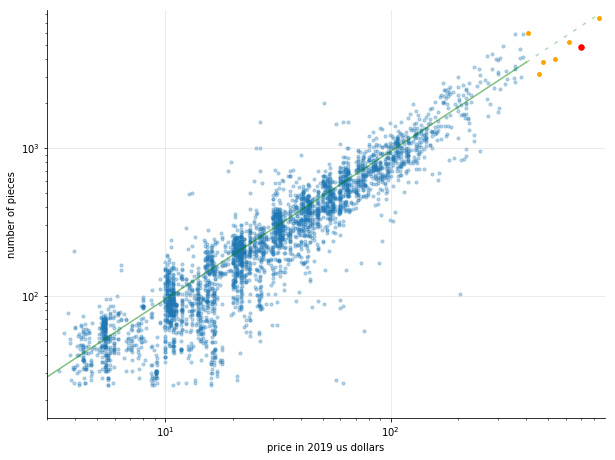

In [109]:
df = df_filtered.copy()

df = df[df['year'] >= '2005']
df = df.dropna(subset=['pieces'])
df = df[df['is_licensed'] | df['is_original']]

expensive_cutoff = 400.0
df_expensive = df[df['adjusted_price'] >= expensive_cutoff]
df = df[df['adjusted_price'] < expensive_cutoff]

print(len(df))
print('price vs pieces')

scatter_plot(
    populations=[
        {
            'x': df['adjusted_price'],
            'y': df['pieces'],
        },
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['pieces'],    
            'kwargs': {'s': 15,'color': 'orange', 'alpha': 1}
        }, 
        {
            'x': [699.99],
            'y': [4782.0],
            'kwargs': {'s': 30, 'alpha': 1.0, 'color': 'red'}
        },
    ],
    x_label='price in 2019 us dollars',
    y_label='number of pieces',
    scale='log',
)

3400
price vs set weight


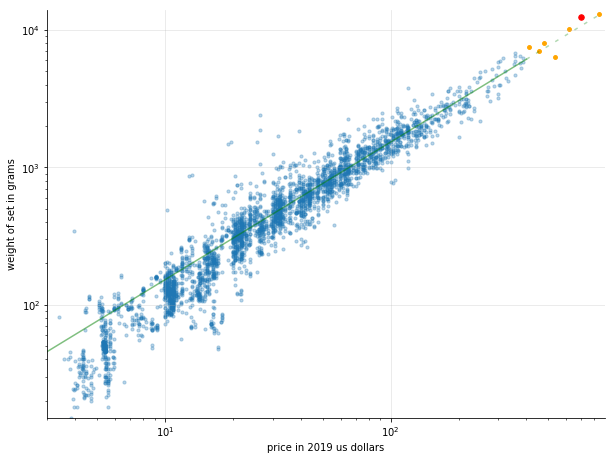

In [110]:
df = df_filtered.copy()

df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price', 'set_weight'])
df = df[df['is_licensed'] | df['is_original']]

expensive_cutoff = 400.0
df_expensive = df[df['adjusted_price'] >= expensive_cutoff]
df = df[df['adjusted_price'] < expensive_cutoff]

print(len(df))
print('price vs set weight')

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['set_weight'],       
        }, 
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['set_weight'],    
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        },
        {
            'x': [699.99],
            'y': [12500.0],
            'kwargs': {'s': 30, 'alpha': 1.0, 'color': 'red'}
        },
    ],
    'price in 2019 us dollars',
    'weight of set in grams',
    scale='log',
)

3218
price vs weight (inventory method)


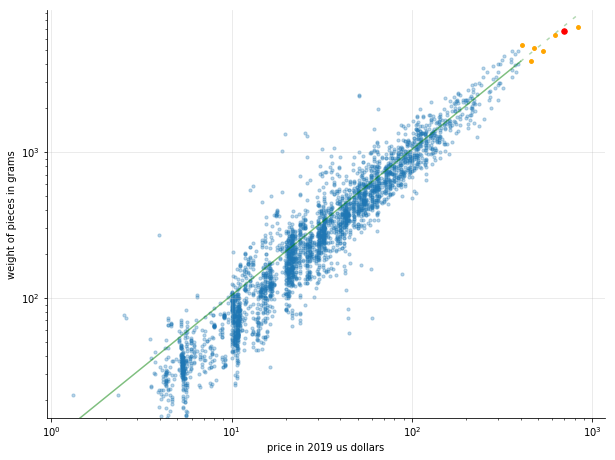

In [104]:
df = df_filtered.copy()

df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price', 'parts_weight_inv'])
df = df[df['is_licensed'] | df['is_original']]
df = df[df['pct_missing_parts'] < 0.05]

expensive_cutoff = 400.0
df_expensive = df[df['adjusted_price'] >= expensive_cutoff]
df = df[df['adjusted_price'] < expensive_cutoff]

print(len(df))
print('price vs weight (inventory method)')

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['parts_weight_inv'],
        },
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['parts_weight_inv'],   
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        },
        {
            'x': [699.99],
            'y': [6781.0],
            'kwargs': {'s': 30, 'alpha': 1.0, 'color': 'red'}
        },
    ],
    'price in 2019 us dollars',
    'weight of pieces in grams',
    scale='log',
)


2540
price vs weight (arithmetic method)


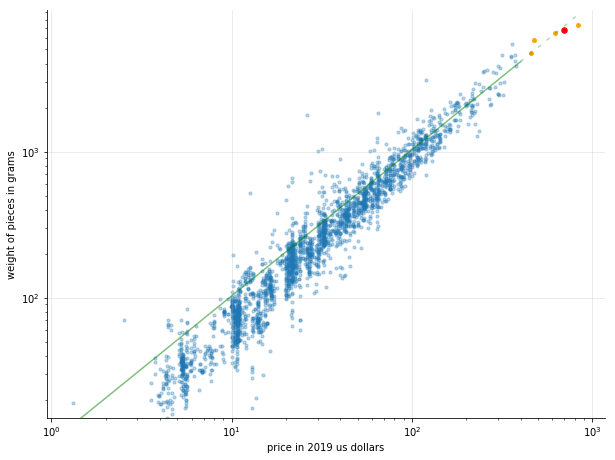

In [105]:
df = df_filtered.copy()

df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price', 'parts_weight_est'])
df = df[df['is_licensed'] | df['is_original']]

expensive_cutoff = 400.0
df_expensive = df[df['adjusted_price'] >= expensive_cutoff]
df = df[df['adjusted_price'] < expensive_cutoff]

print(len(df))
print('price vs weight (arithmetic method)')

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['parts_weight_est'],
        },
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['parts_weight_est'],   
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        },
        {
            'x': [699.99],
            'y': [6781.0],
            'kwargs': {'s': 30, 'alpha': 1.0, 'color': 'red'}
        },

    ],
    'price in 2019 us dollars',
    'weight of pieces in grams',
    plot_ols=True,
    scale='log',
)

In [76]:
def year_plot(df, col, col_nominal=None, y_label=''):
    plt.plot(
        df.index,
        df[col],
        linewidth=3,
    )
    if col_nominal:
        plt.plot(
            df.index,
            df[col_nominal],
            linewidth=3,
        )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.ylabel(y_label)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.grid(axis='y', alpha=0.3)
    plt.gcf().set_size_inches(10, 5)
    plt.show()

3172


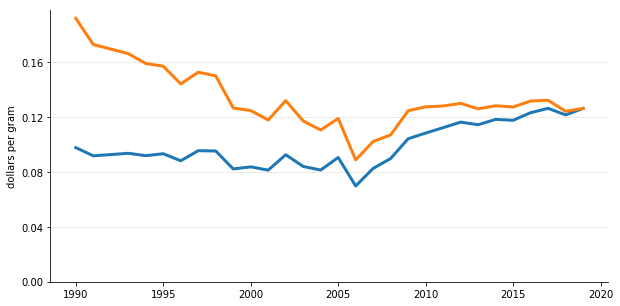

In [84]:
df = df_filtered.copy()

col1 = 'price_per_gram_est'
col2 = 'adj_' + col1

df = df[df['is_licensed'] | df['is_original']]
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1, col2])
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1, col2]].median()

year_plot(df, col1, col2, 'dollars per gram')

4552


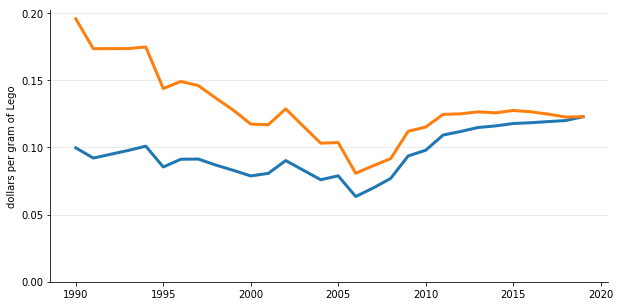

In [83]:
df = df_filtered.copy()

col1 = 'price_per_gram_inv'
col2 = 'adj_' + col1

df = df[df['is_licensed'] | df['is_original']]
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1, col2])
df = df[df['pct_missing_parts'] < 0.05]
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1, col2]].median()

year_plot(df, col1, col2, 'dollars per gram of Lego')

4957


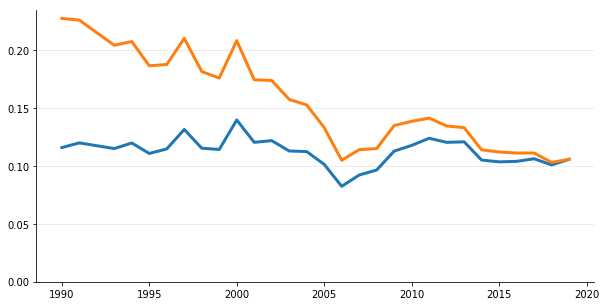

In [82]:
df = df_filtered.copy()

col1 = 'price_per_piece'
col2 = 'adj_' + col1

df = df[df['is_licensed'] | df['is_original']]
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1, col2])
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1, col2]].median()

year_plot(df, col1, col2)

4786


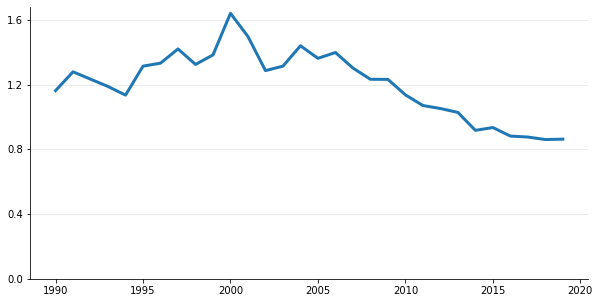

In [237]:
df = df_filtered.copy()

col1 = 'weight_per_piece_inv'

df = df[df['is_licensed'] | df['is_original']]
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1])
df = df[df['pct_missing_parts'] < 0.05]
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1]].median()

year_plot(df, col1)

3337


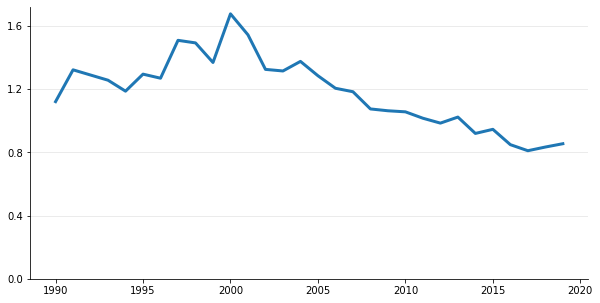

In [242]:
df = df_filtered.copy()

col1 = 'weight_per_piece_est'

df = df[df['is_licensed'] | df['is_original']]
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1])
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1]].median()

year_plot(df, col1)

466


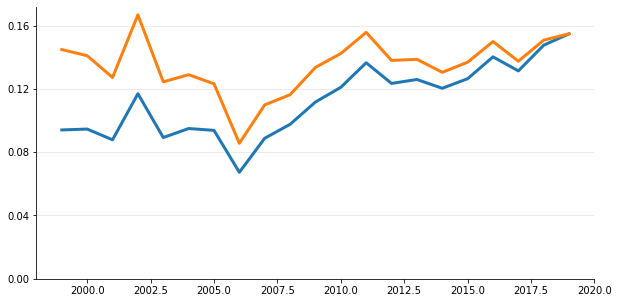

In [248]:
df = df_filtered.copy()

col1 = 'price_per_gram_inv'
col2 = 'adj_' + col1

df = df[df['theme'] == 'Star Wars']
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1])
df = df[df['pct_missing_parts'] < 0.05]
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1, col2]].median()

year_plot(df, col1, col2)

422


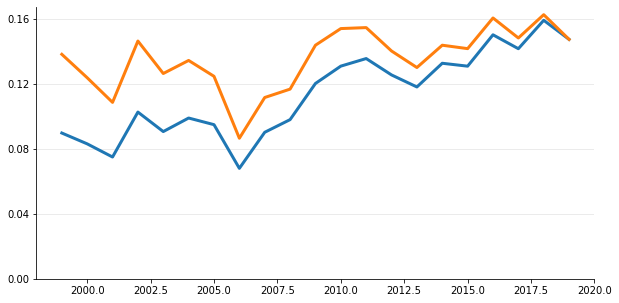

In [247]:
df = df_filtered.copy()

col1 = 'price_per_gram_est'
col2 = 'adj_' + col1

df = df[df['theme'] == 'Star Wars']
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1])
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1, col2]].median()

year_plot(df, col1, col2)

512


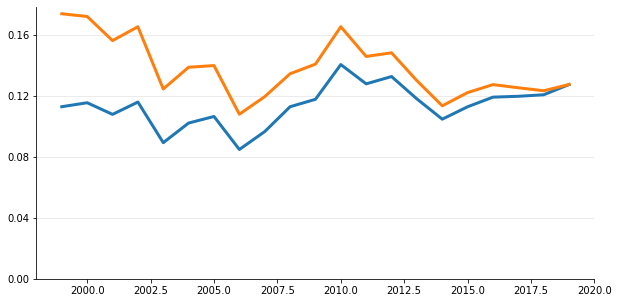

In [249]:
df = df_filtered.copy()

col1 = 'price_per_piece'
col2 = 'adj_' + col1

df = df[df['theme'] == 'Star Wars']
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1])
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1, col2]].median()

year_plot(df, col1, col2)

422


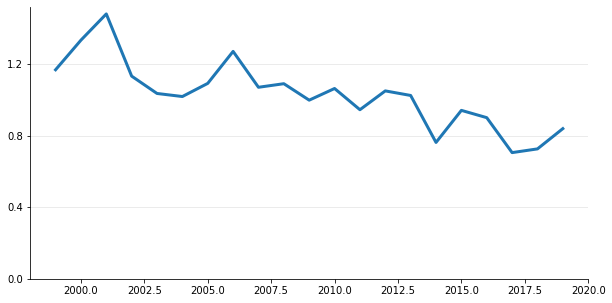

In [250]:
df = df_filtered.copy()

col1 = 'weight_per_piece_est'

df = df[df['theme'] == 'Star Wars']
df = df[df['year'] >= '1990']

df = df.dropna(subset=[col1])
df['year'] = df['year'].astype(int)

print(len(df))

df = df.groupby('year')[[col1]].median()

year_plot(df, col1)

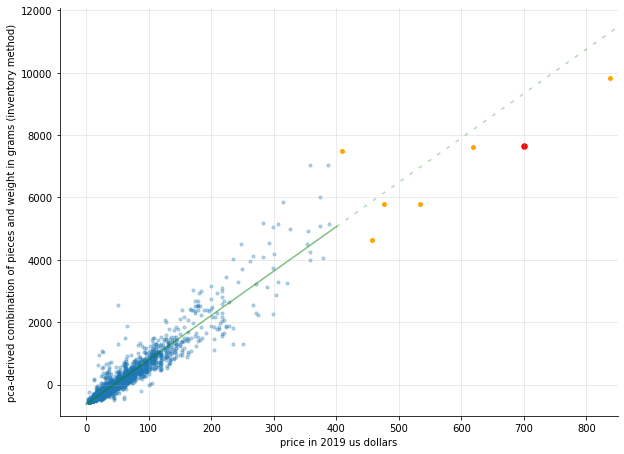

,number,theme,name,adjusted_price,pieces,parts_weight_inv,pca
2303,10179-1,Star Wars,Ultimate Collector's Millennium Falcon,618.670768,5197.0,6358.460,7617.819169
2465,10188-1,Star Wars,Death Star,476.633556,3803.0,5146.710,5782.614912
3051,10221-1,Star Wars,Super Star Destroyer,456.215394,3152.0,4205.445,4648.858989
4597,75159-1,Star Wars,Death Star,534.469555,4016.0,4950.005,5781.539013
4975,75192-1,Star Wars,Millennium Falcon,837.319821,7541.0,7210.768,9829.986800
5341,71043-1,Harry Potter,Hogwarts Castle,408.673205,6020.0,5409.817,7474.630051
5695,75252-1,Star Wars,Imperial Star Destroyer,699.990000,4784.0,6781.291,7650.443317


In [23]:
from sklearn.decomposition import PCA

df = df_filtered.copy()

df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price', 'parts_weight_inv', 'pieces'])
df = df[df['is_licensed'] | df['is_original']]
df = df[df['pct_missing_parts'] < 0.05]

pca = PCA(n_components=2, svd_solver='full')
df['pca'] = pca.fit_transform(df[['pieces', 'parts_weight_inv']]).tolist()
df['pca'] = [p[0] for p in df['pca']]

df_expensive = df[df['adjusted_price'] > 400]
df = df[df['adjusted_price'] < 400]


scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['pca'],       
        }, 
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['pca'],    
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        },
        {
            'x': [699.99],
            'y': [7650.443317],
            'kwargs': {'s': 30, 'alpha': 1.0, 'color': 'red'}
        }
    ],
    'price in 2019 us dollars',
    'pca-derived combination of pieces and weight in grams (inventory method)',
    ymin=-1000
)

df_expensive[['number', 'theme', 'name', 'adjusted_price', 'pieces', 'parts_weight_inv', 'pca']]

[0.06365525]


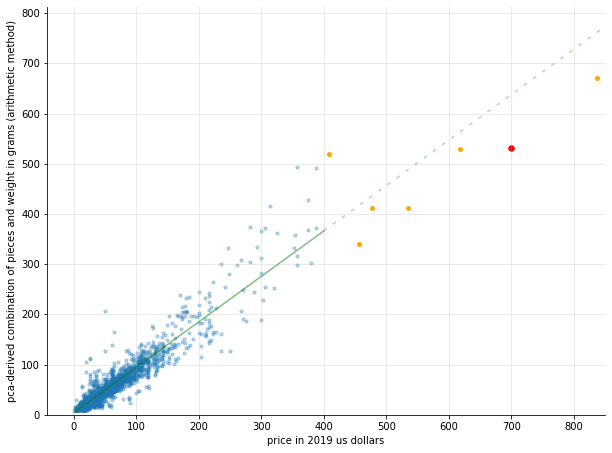

,number,theme,name,adjusted_price,pieces,parts_weight_inv,pca,prediction
2303,10179-1,Star Wars,Ultimate Collector's Millennium Falcon,618.670768,5197.0,6358.460,7644.610543,529.584301
2465,10188-1,Star Wars,Death Star,476.633556,3803.0,5146.710,5809.851929,412.792282
3051,10221-1,Star Wars,Super Star Destroyer,456.215394,3152.0,4205.445,4675.763343,340.601589
4597,75159-1,Star Wars,Death Star,534.469555,4016.0,4950.005,5808.207631,412.687614
4975,75192-1,Star Wars,Millennium Falcon,837.319821,7541.0,7210.768,9854.500117,670.255375
5341,71043-1,Harry Potter,Hogwarts Castle,408.673205,6020.0,5409.817,7498.990461,520.314818
5695,75252-1,Star Wars,Imperial Star Destroyer,699.990000,4784.0,6781.291,7678.393193,531.734744


In [165]:
from sklearn.decomposition import PCA

df = df_filtered.copy()

tmp_features = ['pieces', 'parts_weight_inv', 'minifigs']

df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price'] + tmp_features)
df = df[df['is_licensed'] | df['is_original']]

pca = PCA(n_components=2, svd_solver='full')
df['pca'] = pca.fit_transform(df[tmp_features]).tolist()
df['pca'] = [p[0] for p in df['pca']]

df_expensive = df[df['adjusted_price'] > 400]
df = df[df['adjusted_price'] < 400]

# train model
model = Ridge()
model.fit(df[['pca']], df['adjusted_price'])

print(model.coef_)

df['prediction'] = model.predict(df[['pca']])
df_expensive['prediction'] = model.predict(df_expensive[['pca']])


scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['prediction'],
        }, 
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['prediction'],    
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        },
        {
            'x': [699.99],
            'y': [531.73],
            'kwargs': {'s': 30, 'alpha': 1.0, 'color': 'red'}
        }
    ],
    'price in 2019 us dollars',
    'pca-derived combination of pieces and weight in grams (arithmetic method)',
)

df_expensive[['number', 'theme', 'name', 'adjusted_price', 'pieces', 'parts_weight_inv', 'pca', 'prediction']]

[0.02837565 0.05666244 2.01359934]


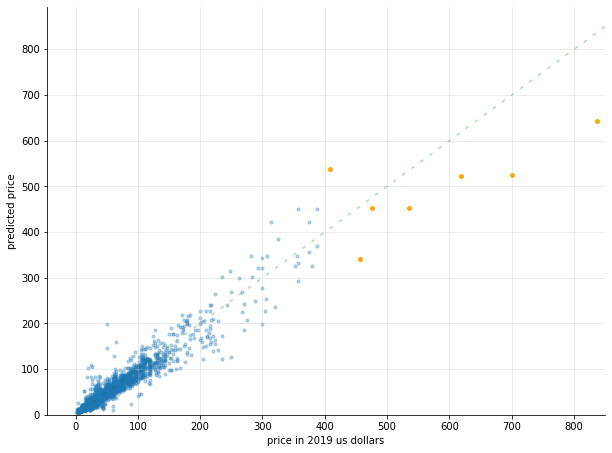

,number,theme,name,adjusted_price,pieces,parts_weight_inv,prediction
2303,10179-1,Star Wars,Ultimate Collector's Millennium Falcon,618.670768,5197.0,6358.460,522.145991
2465,10188-1,Star Wars,Death Star,476.633556,3803.0,5146.710,452.188010
3051,10221-1,Star Wars,Super Star Destroyer,456.215394,3152.0,4205.445,342.122703
4597,75159-1,Star Wars,Death Star,534.469555,4016.0,4950.005,453.127037
4975,75192-1,Star Wars,Millennium Falcon,837.319821,7541.0,7210.768,642.993167
5341,71043-1,Harry Potter,Hogwarts Castle,408.673205,6020.0,5409.817,538.059512
5695,75252-1,Star Wars,Imperial Star Destroyer,699.990000,4784.0,6781.291,524.317486


In [171]:
from sklearn.linear_model import Ridge

tmp_features = ['pieces', 'parts_weight_inv', 'minifigs']

df = df_filtered.copy()
df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price'] + tmp_features)
df = df[df['is_licensed'] | df['is_original']]
df = df[df['pct_missing_parts'] < 0.05]

df_expensive = df[df['adjusted_price'] > 400]
df = df[df['adjusted_price'] < 400]

# train model
model = Ridge()
model.fit(df[tmp_features], df['adjusted_price'])

print(model.coef_)

df['prediction'] = model.predict(df[tmp_features])
df_expensive['prediction'] = model.predict(df_expensive[tmp_features])

plt.plot(
    (0, 850),
    (0, 850),
    alpha=0.3,
    color='green',
    linestyle='--',
    dashes=(2.5, 5)
)

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['prediction'],       
        }, 
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['prediction'],    
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        }
    ],
    'price in 2019 us dollars',
    'predicted price',
    plot_ols=False
)

df_expensive[['number', 'theme', 'name', 'adjusted_price', 'pieces', 'parts_weight_inv', 'prediction']]

[0.02837565 0.05666244 2.01359934]


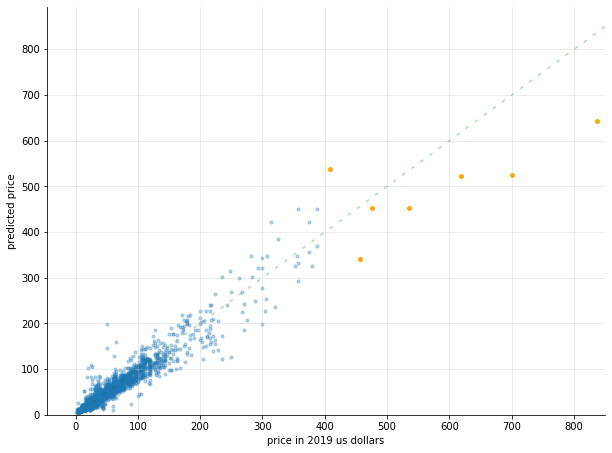

,number,theme,name,adjusted_price,pieces,parts_weight_inv,prediction
2303,10179-1,Star Wars,Ultimate Collector's Millennium Falcon,618.670768,5197.0,6358.460,522.145991
2465,10188-1,Star Wars,Death Star,476.633556,3803.0,5146.710,452.188010
3051,10221-1,Star Wars,Super Star Destroyer,456.215394,3152.0,4205.445,342.122703
4597,75159-1,Star Wars,Death Star,534.469555,4016.0,4950.005,453.127037
4975,75192-1,Star Wars,Millennium Falcon,837.319821,7541.0,7210.768,642.993167
5341,71043-1,Harry Potter,Hogwarts Castle,408.673205,6020.0,5409.817,538.059512
5695,75252-1,Star Wars,Imperial Star Destroyer,699.990000,4784.0,6781.291,524.317486


In [132]:
from sklearn.linear_model import Ridge

tmp_features = ['pieces', 'parts_weight_inv', 'minifigs']

df = df_filtered.copy()
df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price'] + tmp_features)
df = df[df['is_licensed'] | df['is_original']]
df = df[df['pct_missing_parts'] < 0.05]

df_expensive = df[df['adjusted_price'] > 400]
df = df[df['adjusted_price'] < 400]

# train model
model = Ridge()
model.fit(df[tmp_features], df['adjusted_price'])

print(model.coef_)

df['prediction'] = model.predict(df[tmp_features])
df_expensive['prediction'] = model.predict(df_expensive[tmp_features])

plt.plot(
    (0, 850),
    (0, 850),
    alpha=0.3,
    color='green',
    linestyle='--',
    dashes=(2.5, 5)
)

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['prediction'],       
        }, 
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['prediction'],    
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        }
    ],
    'price in 2019 us dollars',
    'predicted price',
    plot_ols=False
)

df_expensive[['number', 'theme', 'name', 'adjusted_price', 'pieces', 'parts_weight_inv', 'prediction']]

[0.07678984 0.0330514 ]


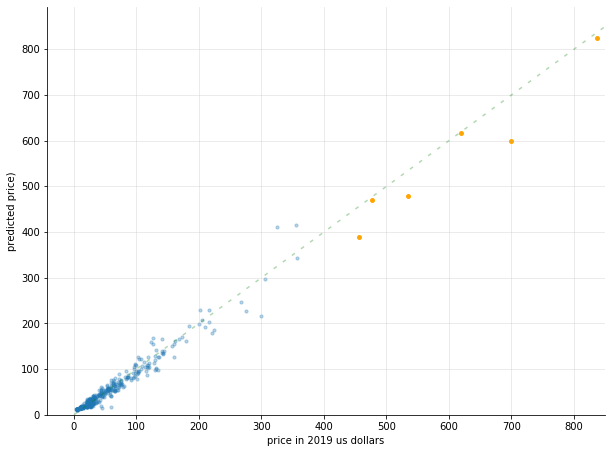

155
223


,number,theme,name,adjusted_price,pieces,parts_weight_inv,prediction
2303,10179-1,Star Wars,Ultimate Collector's Millennium Falcon,618.670768,5197.0,6358.460,616.536052
2465,10188-1,Star Wars,Death Star,476.633556,3803.0,5146.710,469.440983
3051,10221-1,Star Wars,Super Star Destroyer,456.215394,3152.0,4205.445,388.340671
4597,75159-1,Star Wars,Death Star,534.469555,4016.0,4950.005,479.295842
4975,75192-1,Star Wars,Millennium Falcon,837.319821,7541.0,7210.768,824.701403
5695,75252-1,Star Wars,Imperial Star Destroyer,699.990000,4784.0,6781.291,598.797007


In [178]:
from sklearn.linear_model import Ridge, LinearRegression

tmp_features = ['pieces', 'parts_weight_inv']

df = df_filtered.copy()

df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price'] + tmp_features)
df = df[df['theme']=='Star Wars']
df = df[df['pct_missing_parts'] < 0.05]

df_expensive = df[df['adjusted_price'] > 400]
df = df[df['adjusted_price'] < 400]

# train model

model = Ridge()
# model = LinearRegression()
model.fit(df[tmp_features], df['adjusted_price'])

print(model.coef_)

df['prediction'] = model.predict(df[tmp_features])
df_expensive['prediction'] = model.predict(df_expensive[tmp_features])

plt.plot(
    (0, 850),
    (0, 850),
    alpha=0.3,
    color='green',
    linestyle='--',
    dashes=(2.5, 5)
)

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['prediction'],       
        }, 
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['prediction'],    
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        }
    ],
    'price in 2019 us dollars',
    'predicted price)',
    plot_ols=False
)

print(len(df[df['adjusted_price'] > df['prediction']]))
print(len(df[df['adjusted_price'] < df['prediction']]))

df_expensive[['number', 'theme', 'name', 'adjusted_price', 'pieces', 'parts_weight_inv', 'prediction']]

[0.04091793 0.06171053 1.32539392]


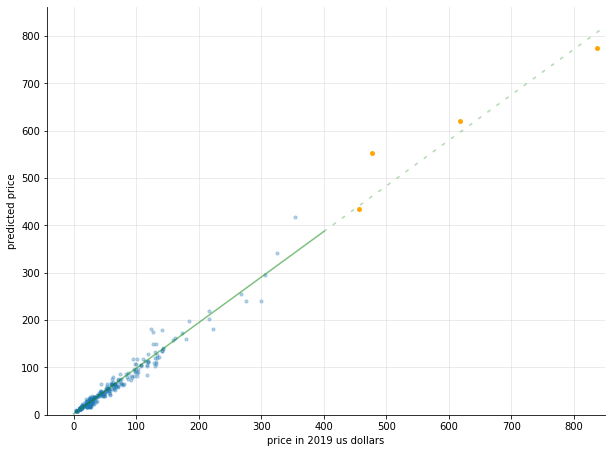

,number,theme,name,adjusted_price,pieces,parts_weight_inv,prediction
2303,10179-1,Star Wars,Ultimate Collector's Millennium Falcon,618.670768,5197.0,6358.460,621.078613
2465,10188-1,Star Wars,Death Star,476.633556,3803.0,5146.710,552.423510
3051,10221-1,Star Wars,Super Star Destroyer,456.215394,3152.0,4205.445,433.795630
4975,75192-1,Star Wars,Millennium Falcon,837.319821,7541.0,7210.768,774.537340


In [121]:
from sklearn.linear_model import Ridge

tmp_features = ['pieces', 'parts_weight_est', 'minifigs']

df = df_filtered.copy()

df = df[df['year'] >= '2005']
df = df.dropna(subset=['adjusted_price'] + tmp_features)
df = df[df['theme']=='Star Wars']
df = df[df['pct_missing_parts'] < 0.05]

df_expensive = df[df['adjusted_price'] > 400]
df = df[df['adjusted_price'] < 400]


# train model

model = Ridge()
model.fit(df[tmp_features], df['adjusted_price'])

print(model.coef_)

df['prediction'] = model.predict(df[tmp_features])
df_expensive['prediction'] = model.predict(df_expensive[tmp_features])

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['prediction'],       
        }, 
        {
            'x': df_expensive['adjusted_price'],
            'y': df_expensive['prediction'],    
            'kwargs': {'s': 15, 'color': 'orange', 'alpha': 1}
        }
    ],
    'price in 2019 us dollars',
    'predicted price',
)

df_expensive[['number', 'theme', 'name', 'adjusted_price', 'pieces', 'parts_weight_inv', 'prediction']]